## Exercise for Graph IV 🛹
Your task:
Make the graph on the right! You will need to make use of 2
conditional edges!
Input: initial_state = AgentState(number1 = 10, operation="-",
number2 = 5, number3 = 7, number4=2, operation2="+",
finalNumber= 0, finalNumber2 = 0)

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

## Create class schema for the StateAgent

In [ ]:
class MyStateAgent(TypedDict):
    num1: int
    operation: str
    num2: int
    num3: int 
    operation2: str
    num4: int
    result: int
    result2: int

## Create 4 function nodes

In [ ]:
def add_operation(state: MyStateAgent) -> MyStateAgent:
    """
    Adds two numbers.
    """
    if state["operation"] == "+":
        state["result"] = state["num1"] + state["num2"]
    return state

def sub_operation(state: MyStateAgent) -> MyStateAgent:
    """
    Subtracts two numbers.
    """
    if state["operation"] == "-":
        state["result"] = state["num1"] - state["num2"]
    return state

def add_operation2(state: MyStateAgent) -> MyStateAgent:
    """
    Adds two numbers.
    """
    if state["operation2"] == "+":
        state["result2"] = state["num3"] + state["num4"]
    return state

def sub_operation2(state: MyStateAgent) -> MyStateAgent:
    """
    Subtracts two numbers.
    """
    if state["operation2"] == "-":
        state["result2"] = state["num3"] - state["num4"]
    return state

## Create 2 decision nodes

In [24]:
def decision_node(state: MyStateAgent) -> MyStateAgent:
    """
    Decides which operation to perform.
    """
    if state["operation"] == "+":
        return 'add_operation'
    elif state["operation"] == "-":
        return 'sub_operation'

def decision_node2(state: MyStateAgent) -> MyStateAgent:
    """
    Decides which operation to perform.
    """
    if state["operation2"] == "+":
        return 'add_operation2'
    elif state["operation2"] == "-":
        return 'sub_operation2'


## Build and compile the graph

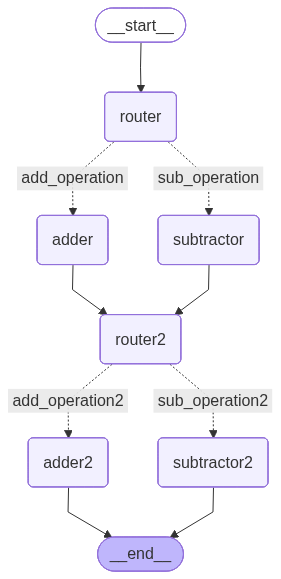

In [25]:
graph = StateGraph(MyStateAgent)

graph.add_node('adder', add_operation)
graph.add_node('subtractor', sub_operation)
graph.add_node('router', lambda state:state)
graph.add_node('adder2', add_operation2)
graph.add_node('subtractor2', sub_operation2)
graph.add_node('router2', lambda state:state)


graph.add_edge(START, 'router')

graph.add_conditional_edges('router',decision_node,
{
    #Edge:node
    'add_operation': 'adder',
    'sub_operation': 'subtractor'
})
graph.add_edge('adder', 'router2')
graph.add_edge('subtractor', 'router2')

graph.add_conditional_edges('router2',decision_node2,
{
    #Edge:node
    'add_operation2': 'adder2',
    'sub_operation2': 'subtractor2'
})

graph.add_edge('adder2', END)
graph.add_edge('subtractor2', END)

app=graph.compile()
app

## Invoke the graph

In [26]:
initial_state = MyStateAgent(num1 = 10, operation="-",
num2 = 5, num3 = 7, operation2="+",num4=2)

result_state = app.invoke(initial_state)
result_state

{'num1': 10,
 'operation': '-',
 'num2': 5,
 'num3': 7,
 'operation2': '+',
 'num4': 2,
 'result': 5,
 'result2': 9}